In [25]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df= pd.read_csv('salary.csv')
df.head()

,Name,age,income($)
0,rob,27,45000
1,mohan,28,50000
2,ismail,43,160000
3,adarsh,35,100000
4,sunil,28,47000


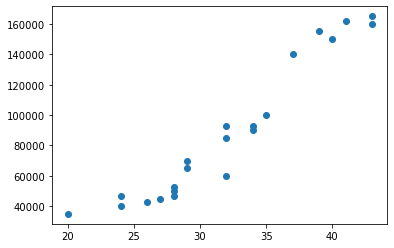

In [27]:
plt.scatter(df['age'],df['income($)'])

In [28]:
km= KMeans(n_clusters=4)
km

KMeans(n_clusters=4)

In [29]:
y_pred = km.fit_predict(df[['age','income($)']])
y_pred

array([1, 1, 2, 0, 1, 3, 2, 2, 2, 1, 1, 2, 0, 0, 1, 3, 3, 1, 0, 2, 1, 0])

In [67]:
df['cluster']= y_pred
df.head()

,Name,age,income($),cluster
0,rob,0.304348,0.076923,2
1,mohan,0.347826,0.115385,2
2,ismail,1.000000,0.961538,1
3,adarsh,0.652174,0.500000,0
4,sunil,0.347826,0.092308,2


In [68]:
df0= df[df.cluster==0]
df1= df[df.cluster==1]
df2= df[df.cluster==2]
df3= df[df.cluster==3]

No handles with labels found to put in legend.


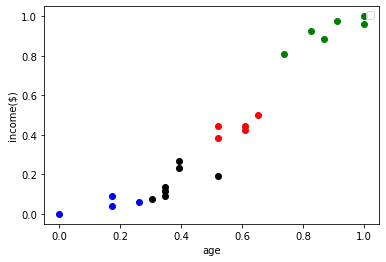

In [69]:
plt.scatter(df0.age,df0['income($)'],color='red')
plt.scatter(df1.age,df1['income($)'],color='green')
plt.scatter(df2.age,df2['income($)'],color='black')
plt.scatter(df3.age,df3['income($)'],color='blue')

plt.xlabel('age')
plt.ylabel('income($)')
plt.legend()

In [70]:
scaler= MinMaxScaler()
scaler.fit(df[['income($)']])
df['income($)']= scaler.transform(df[['income($)']])

scaler.fit(df[['age']])
df['age']= scaler.transform(df[['age']])



df.head()

,Name,age,income($),cluster
0,rob,0.304348,0.076923,2
1,mohan,0.347826,0.115385,2
2,ismail,1.000000,0.961538,1
3,adarsh,0.652174,0.500000,0
4,sunil,0.347826,0.092308,2


No handles with labels found to put in legend.


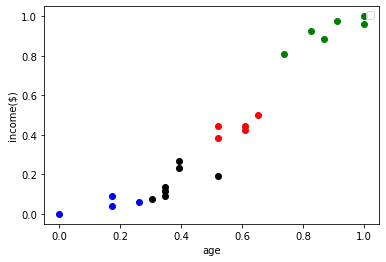

In [71]:
df0= df[df.cluster==0]
df1= df[df.cluster==1]
df2= df[df.cluster==2]
df3= df[df.cluster==3]

plt.scatter(df0.age,df0['income($)'],color='red')
plt.scatter(df1.age,df1['income($)'],color='green')
plt.scatter(df2.age,df2['income($)'],color='black')
plt.scatter(df3.age,df3['income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,])

plt.xlabel('age')
plt.ylabel('income($)')
plt.legend()

In [72]:
km.cluster_centers_

array([[0.5826087 , 0.44      ],
       [0.89130435, 0.92564103],
       [0.37888199, 0.15934066],
       [0.15217391, 0.04807692]])

No handles with labels found to put in legend.


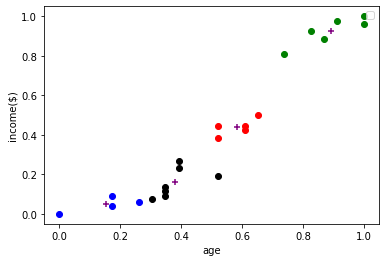

In [73]:
df0= df[df.cluster==0]
df1= df[df.cluster==1]
df2= df[df.cluster==2]
df3= df[df.cluster==3]

plt.scatter(df0.age,df0['income($)'],color='red')
plt.scatter(df1.age,df1['income($)'],color='green')
plt.scatter(df2.age,df2['income($)'],color='black')
plt.scatter(df3.age,df3['income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple',marker='+')

plt.xlabel('age')
plt.ylabel('income($)')
plt.legend()

In [85]:
sse=[]
k_val= range(1,10)
for k in k_val:
    km= KMeans(n_clusters=k)
    km.fit(df[['age','income($)']])
    sse.append(km.inertia_)

In [86]:
sse

[4.289797795631735,
 0.9975224363635008,
 0.3540052124696593,
 0.1992169947497124,
 0.14369830181935747,
 0.09070882876030466,
 0.06654925000838914,
 0.052509045387262594,
 0.038138974955537384]

Text(0, 0.5, 'Sum of square error')

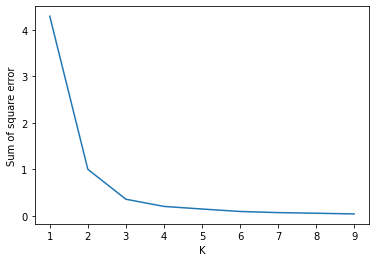

In [88]:
import numpy as np
plt.plot(k_val,sse)
plt.xlabel('K')
plt.ylabel('Sum of square error')
